In [2]:
# import libraries

import cv2
import matplotlib.pyplot as plt

In [3]:
# helper function to show images in matplotlib, since OpenCV loads in BGR, this invert the channels

def imgshow(img):
    plt.figure(figsize=(10,10))
    plt.imshow((img[:,:,::-1]))

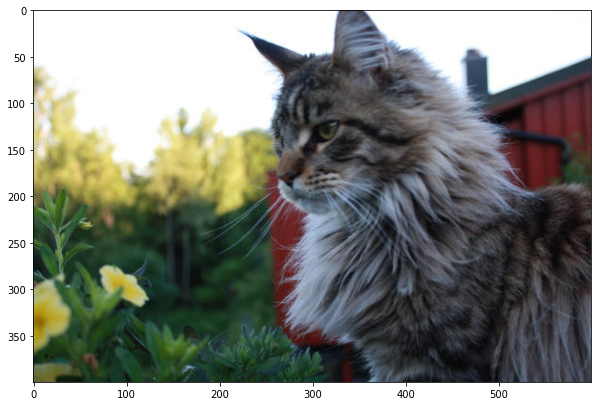

In [4]:
# load the image

cat = cv2.imread('./img/cat.jpg')

imgshow(cat)

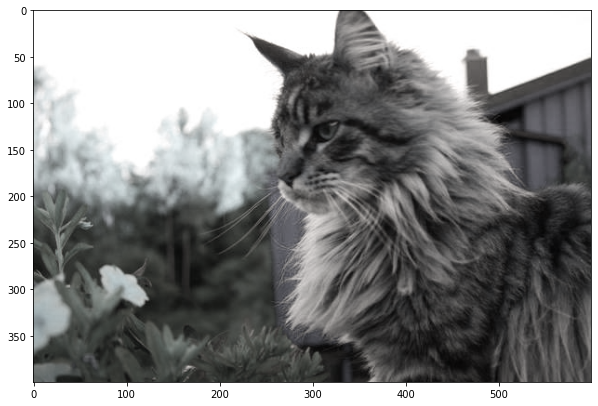

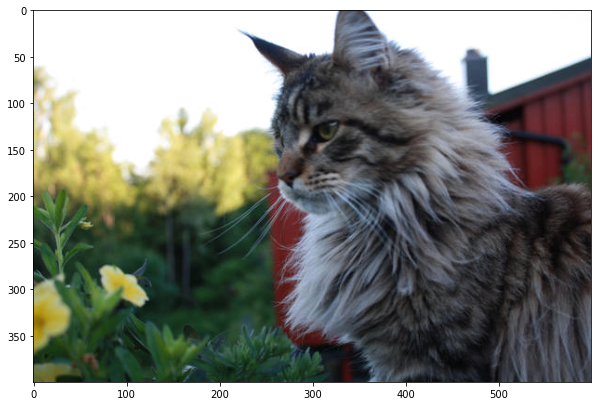

In [13]:
# copy of the original image to work with
cat_copy = cat.copy()

# convert to HSV to work on the saturation
cat_hsv = cv2.cvtColor(cat_copy, cv2.COLOR_BGR2HSV)

# splitting the channel
h, s, v, = cv2.split(cat_hsv)

# get the saturation to 10%
s1 = s // 10

# if we merge the channel now, we get a bluish image, so we need to convert back from HSV to BGR
bluish = cv2.merge([h,s1,v])
cat_gray = cv2.cvtColor(bluish, cv2.COLOR_HSV2BGR)

# show the image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(cat_gray)

# if we want to restore the original color back, we multiply the saturation by 100
s2 = s1 * 10

# we merge the channel again and convert the colorspaces
merged = cv2.merge([h, s2, v])
cat_color = cv2.cvtColor(merged, cv2.COLOR_HSV2BGR)

imgshow(cat_color)